In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
%matplotlib inline

In [2]:
def read_image(IMG_NAME):
    # YOUR CODE HERE
    IMG_DIR = 'images/'
    img = cv2.imread(IMG_DIR + IMG_NAME,0)
#   img = cv2.imread(IMG_NAME,1)
#   img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#   cv2.imshow('image',img)
    img = (img).astype(np.uint8)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    return img

In [3]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    ### YOUR CODE HERE ###
    mosaic_shape = np.shape(mosaic_img)
#     print(mosaic_shape[0],mosaic_shape[1])
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    blue = soln_image[:,:,0]
    green = soln_image[:,:,1]
    red = soln_image[:,:,2]    

    mosaic_img = mosaic_img.astype(np.float64)
    blue = mosaic_img.copy()
    blue[::2,:] = 0
    blue[:,::2] = 0
#     print("Blue:\n",blue)
    green = mosaic_img.copy()
    green[::2,::2] = 0
    green[1::2,1::2] = 0
#     print("Green:\n",green)
    red = mosaic_img.copy()
    red[1::2,:] = 0
    red[:,1::2] = 0
#     print("Red:\n",red)
    
    from scipy import ndimage    
    k1 = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])
    r = ndimage.convolve(red, k1, mode='mirror')
    b = ndimage.convolve(blue, k1, mode='mirror')
    k2 = np.array([[0,0.25,0],[0.25,1,0.25],[0,0.25,0]])
    g = ndimage.convolve(green, k2, mode='constant', cval=0.0)
#     g = ndimage.convolve(green, k2, mode='mirror')

    soln_image[:,:,0] = b
    soln_image[:,:,1] = g
    soln_image[:,:,2] = r
    np.clip(soln_image, 0, 255)
#     print(soln_image) 
    soln_image = soln_image.astype(np.uint8)
    return soln_image

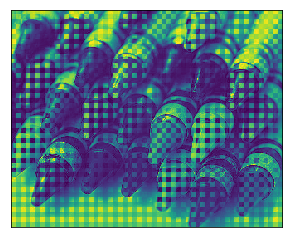

In [4]:
IMG_NAME = 'crayons.bmp'
mosaic_img = read_image(IMG_NAME)# YOUR CODE HERE
soln_image = get_solution_image(mosaic_img)

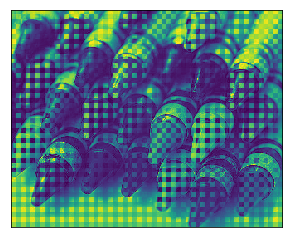

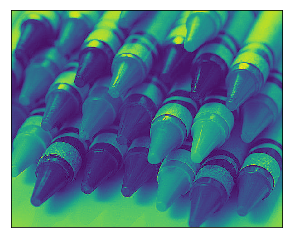

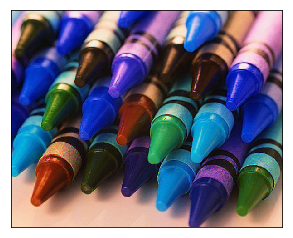

In [5]:
mosaic_img = read_image('crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [6]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    A = np.zeros((600, 480, 3))
    A = soln_image.astype(np.float64)
    B = np.zeros((600, 480, 3))
    B = original_image.astype(np.float64)
    squares = (A[:,:,:3] - B[:,:,:3]) ** 2
    pp_err = np.sum(squares) / (3*600*480)
    max_err = max(abs(np.max(target)),abs(np.min(target)))   
    # print(target,pp_err,max_err)
    return pp_err,max_err

In [7]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

IndexError: too many indices for array

In [ ]:
mosaic_img = read_image('iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

In [ ]:
mosaic_img = read_image('tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

In [ ]:
mosaic_img = read_image('hope.bmp')
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    mosaic_shape = np.shape(mosaic_img)
    freeman_soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    b = freeman_soln_image[:,:,0]
    g = freeman_soln_image[:,:,1]
    r = freeman_soln_image[:,:,2]    
    mosaic_img = mosaic_img.astype(np.float64)
    b= mosaic_img.copy()
    b[::2,:] = 0
    b[:,::2] = 0
#     print("Blue:\n",b)
    G = mosaic_img.copy()
    G[::2,::2] = 0
    G[1::2,1::2] = 0
#     print("Green:\n",g)
    r = mosaic_img.copy()
    r[1::2,:] = 0
    r[:,1::2] = 0
#     print("Red:\n",r)
    from scipy.signal import medfilt2d
    R = medfilt2d(r-G)+G
    B = medfilt2d(b-G)+G
    freeman_soln_image[:,:,0] = B
    freeman_soln_image[:,:,1] = G
    freeman_soln_image[:,:,2] = R
    np.clip(freeman_soln_image, 0, 255)
    freeman_soln_image = freeman_soln_image.astype(np.uint8)
    return freeman_soln_image

In [ ]:
mosaic_img = read_image('tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

In [ ]:
### Feel free to play around with other images for Freeman's method above ###

In [ ]:
mosaic_img = read_image('hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it
plt.imshow(soln_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [14]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
#     green[::2,::2] = 0
#     green[1::2,1::2] = 0
#     red[1::2,:] = 0
#     red[:,1::2] = 0
    original_image = np.array(original_image)
#     original_image = original_image.convert("RGB")
    original_image = np.asarray(original_image, dtype=np.float64)
    original_shape = np.shape(original_image)
    print(original_shape)
    mosaic_img = np.zeros((original_shape[0], original_shape[1], 2))
    mosaic_img[::2,:] = original_image[::2,:,0]
    mosaic_img[:,::2] = original_image[:,::2,0]
    mosaic_img[::2,::2] = original_image[::2,::2,1]
    mosaic_img[1::2,1::2] = original_image[1::2,1::2,1]
    mosaic_img[1::2,:] = original_image[1::2,:,2]
    mosaic_img[:,1::2] = original_image[:,1::2,2]
    mosaic_img = mosaic_img.astype(np.uint8)
    return mosaic_img

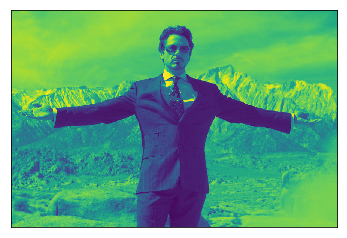

(800, 1200)


IndexError: too many indices for array

In [15]:
### YOUR CODE HERE ###
original_image= read_image('tony.jpg')
mosaic_img = get_mosaic_image(original_image)
# Generate your solution image here and show it
plt.imshow(mosaic_img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####
original_image= read_image('crayons.jpg')
mosaic_img = get_mosaic_image(original_image)
# Generate your solution image here and show it
plt.imshow(mosaic_img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()